In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from dateutil.parser import parse
import parse as str_parse
users = pd.read_csv('ml-users.csv') 
%matplotlib notebook

In [132]:
crop_rows = 100000

In [133]:
df_interactions = pd.read_csv('ml-interactions.tar.gz', compression='gzip')

if crop_rows > 0:
    df_interactions = df_interactions.head(crop_rows)

isna_result = pd.isna(df_interactions['action'])
df_interactions= df_interactions[~isna_result]
isna_result = pd.isna(df_interactions['action'])
assert sum(df_interactions['action'].isna()) == 0

df_interactions.rename(columns = {'ml-interactions.csv':'timestamp'}, inplace = True)

In [134]:
# fill nan temporary label id's
df_interactions['temporary_label_id'] = df_interactions['temporary_label_id'].fillna(method='bfill')

# get rid of nan label id's
df_interactions = df_interactions[~pd.isna(df_interactions['temporary_label_id'])]

In [135]:
label_correctness = pd.read_csv('ml-label-correctness.csv')

In [137]:
labeling_cols = ['user_id', 'audit_task_id', 'temporary_label_id']

In [150]:
label_correctness.set_index(labeling_cols, inplace=True)

In [138]:
interaction_groups = df_interactions.groupby(labeling_cols)

In [144]:
label_features = interaction_groups.apply(lambda x: x['zoom'].mean()).to_frame(name='zoom')

In [176]:
# TODO: figure out why there are duplicates
label_correctness = label_correctness[~label_correctness.index.duplicated()]

In [185]:
label_features['correct'] = label_correctness['correct'].apply(lambda x: True if x == 't' else False if x == 'f' else np.nan)

## Make plots

In [191]:
validated_label_features = label_features[~pd.isna(label_features['correct'])]

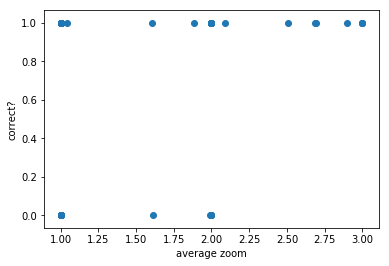

In [194]:
plt.figure()
plt.xlabel('average zoom')
plt.ylabel('correct?')
plt.scatter(validated_label_features['zoom'], validated_label_features['correct'])